In [5]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn 


#Create the training data

In [6]:
#create data
N=2000

#generate data
data=torch.randint(low=-10,high=11,size=(N,2)).float()

#labels
labels=torch.sum(data,axis=1,keepdim=True)

#print data

for i in range (N):
  print(data[i],labels[i])

tensor([8., 4.]) tensor([12.])
tensor([ 5., -8.]) tensor([-3.])
tensor([ 7., -5.]) tensor([2.])
tensor([-8.,  9.]) tensor([1.])
tensor([9., 3.]) tensor([12.])
tensor([-10., -10.]) tensor([-20.])
tensor([  9., -10.]) tensor([-1.])
tensor([0., 0.]) tensor([0.])
tensor([-9.,  6.]) tensor([-3.])
tensor([-2.,  1.]) tensor([-1.])
tensor([-9.,  8.]) tensor([-1.])
tensor([8., 4.]) tensor([12.])
tensor([ 0., -8.]) tensor([-8.])
tensor([ 0., -2.]) tensor([-2.])
tensor([-3.,  3.]) tensor([0.])
tensor([ 8., -1.]) tensor([7.])
tensor([-7., -4.]) tensor([-11.])
tensor([-4., 10.]) tensor([6.])
tensor([ 8., -1.]) tensor([7.])
tensor([ 1., -7.]) tensor([-6.])
tensor([0., 3.]) tensor([3.])
tensor([2., 9.]) tensor([11.])
tensor([8., 0.]) tensor([8.])
tensor([-7., -9.]) tensor([-16.])
tensor([-10.,   2.]) tensor([-8.])
tensor([-3., -5.]) tensor([-8.])
tensor([10., -1.]) tensor([9.])
tensor([ 9., -1.]) tensor([8.])
tensor([ 3., -2.]) tensor([1.])
tensor([-10.,  -7.]) tensor([-17.])
tensor([ 6., -6.]) tenso

#Design the model 

In [8]:
# a function that builds the model 

def createADDmodel():


  #model architecture
  ADDclassify = nn.Sequential(
      nn.Linear(2,30),
      nn.ReLU(),
      nn.Linear(30,1),
      nn.ReLU(),
      nn.Linear(1,1),
  )

  #loss function 
  lossfun = nn.MSELoss()

  #optimizer 
  optimizer = torch.optim.Adam(ADDclassify.parameters(),lr=.01)

  #model output

  return ADDclassify,lossfun,optimizer

#Train The model

In [10]:
# a function that trains the model

# a fixed parameter
numepochs = 10

def trainTheModel(ADDmodel):

  # initialize losses
  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    numloss = []
    # loop through "minibatches" of N=1
    for num,ans in zip(data,labels):

      # forward pass
      yHat = ADDmodel(num)

      # compute loss
      loss = lossfun(yHat,ans)
      numloss.append(loss.item())

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  
  losses[epochi] = np.mean(numloss)
  
  
  # final forward pass
  with torch.no_grad():
    predictions = ADDmodel(data)
  
  # compute the predictions and report accuracy (is this really different from loss?)
  trainacc = 100*torch.mean( (np.abs(predictions-labels)<1).float() ) # <1 for rounding


  ### now test with new data!
  # create brand new test data
  TESTdata = torch.randint(low=-10,high=11,size=(N,2)).float()
  TESTlabels = torch.sum(TESTdata,axis=1,keepdim=True)
  
  # evaluate the model and compute accuracy
  with torch.no_grad():
    predictions = ADDmodel(TESTdata)
  testacc = 100*torch.mean( (np.abs(predictions-TESTlabels)<1).float() )
  
  # EOF
  return losses,trainacc,testacc,ADDmodel

In [11]:
# test the model once to make sure it runs
AddingMachine,lossfun,optimizer = createADDmodel()
losses,trainacc,testacc,ADDmodel = trainTheModel(AddingMachine)

# print the results
trainacc,testacc
# losses

(tensor(95.7000), tensor(97.0500))

In [12]:
# run the model 10 times to check reproducibility

for i in range(10):

  # create a new 'machine' and train it
  AddingMachine,lossfun,optimizer = createADDmodel()
  _,trainacc,testacc,ADDmodel = trainTheModel(AddingMachine)

  # report accuracy
  print('Model instance %s, final TRAIN/TEST accuracies: %g%%, %g%%' %(i+1,trainacc,testacc))

Model instance 1, final TRAIN/TEST accuracies: 99.6%, 99.7%
Model instance 2, final TRAIN/TEST accuracies: 10.35%, 8.3%
Model instance 3, final TRAIN/TEST accuracies: 10.35%, 9.55%
Model instance 4, final TRAIN/TEST accuracies: 99.6%, 99.9%
Model instance 5, final TRAIN/TEST accuracies: 99.8%, 99.8%
Model instance 6, final TRAIN/TEST accuracies: 10.35%, 9.5%
Model instance 7, final TRAIN/TEST accuracies: 10.35%, 9.4%
Model instance 8, final TRAIN/TEST accuracies: 99.8%, 99.85%
Model instance 9, final TRAIN/TEST accuracies: 99.8%, 99.7%
Model instance 10, final TRAIN/TEST accuracies: 99.8%, 99.7%


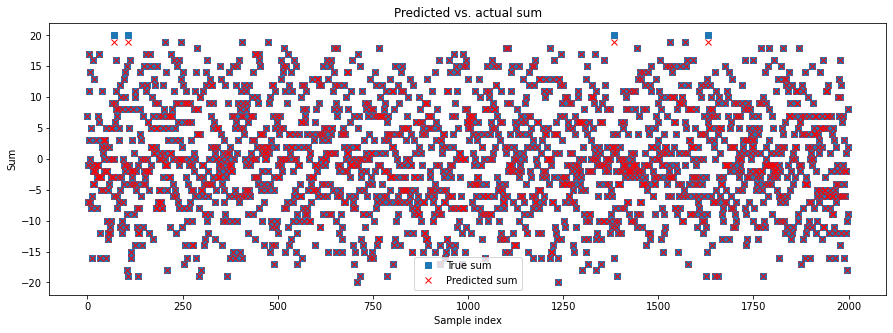

In [13]:
# some plots from the final model

data = torch.randint(low=-10,high=11,size=(N,2)).float()
labels = torch.sum(data,axis=1,keepdim=True)

# evaluate the model and compute accuracy
with torch.no_grad():
  predictions = ADDmodel(data)


# true and predicted values
fig = plt.figure(figsize=(15,5))
plt.plot(labels,'s')
plt.plot(np.round(predictions.detach()),'rx')
plt.legend(['True sum','Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs. actual sum')
plt.show()